### Updated in 04.05.2021
<br> In this notebook we are going to explore the full fledged model of **MDI-QSDC** using single qubits

In [1]:
from qiskit import *
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
import matplotlib.pyplot as plotter
import numpy as np
from IPython.display import display, Math, Latex, Image
%matplotlib inline

Here we are going to explore the QSDC protocol using the following image model
![title](Images/img3.png)

In [10]:
num_epr = 4
num_single = 2
array = [0,1,2,3,4,5]

Sa = QuantumRegister(num_epr, 'aliceS')
Sb = QuantumRegister(num_epr, 'bobS')
Ca = QuantumRegister(num_epr + num_single, 'aliceC')
Cb = QuantumRegister(num_epr + num_single, 'bobC')
Meas = ClassicalRegister(4*num_epr + 2*num_single, 'charlie')

#Ca_epr = np.sort(np.random.choice(num_epr + num_single, size =  num_epr, replace = False))
#Cb_epr = np.sort(np.random.choice(num_epr + num_single, size =  num_epr, replace = False))
#Ca_single = np.setxor1d(array, Ca_epr)
#Cb_single = np.setxor1d(array, Cb_epr)

Ca_epr = [0, 2, 3, 4]
Cb_epr = [0, 2, 3, 5]
Ca_single = [1, 5]
Cb_single = [1, 4]

a_epr_base = np.random.randint(2, size = num_epr)
b_epr_base = np.random.randint(2, size = num_epr)

a_single_base = np.random.randint(2, size = num_single)
b_single_base = np.random.randint(2, size = num_single)
a_single_qbit = np.random.randint(2, size = num_single)
b_single_qbit = np.random.randint(2, size = num_single)

The notations are similar to previous notebook 
1. a_epr_base : here 0 means psi_plus and 1 means psi_minus same with b_epr_base
2. Ca_epr and Cb_epr are the qubit indexes which are entangled with Sa and Sb
3. a_single_base and b_single base: here 0 corresponds Z basis and 1 corresponds X basis
4. a_single_bit and b_single_bit: here 0 means |0> in Z and |+> in X and 1 corresponds to |1> in Z and |-> in X basis


In [7]:
def encode_psi_plus(circuit, a, b):
    circuit.h(a)
    circuit.x(b)
    circuit.cx(a, b)
    return circuit

def encode_psi_minus(circuit, a, b):
    circuit.x([a,b])
    circuit.h(a)
    circuit.cx(a, b)
    return circuit

def bell_meas(circuit, a, b):
    circuit.cx(a, b)
    circuit.h(a)
    return circuit

#### Step 1 : preparing photon sequence
#### Step 2 : Sending qubits Ca and Cb to Charlie

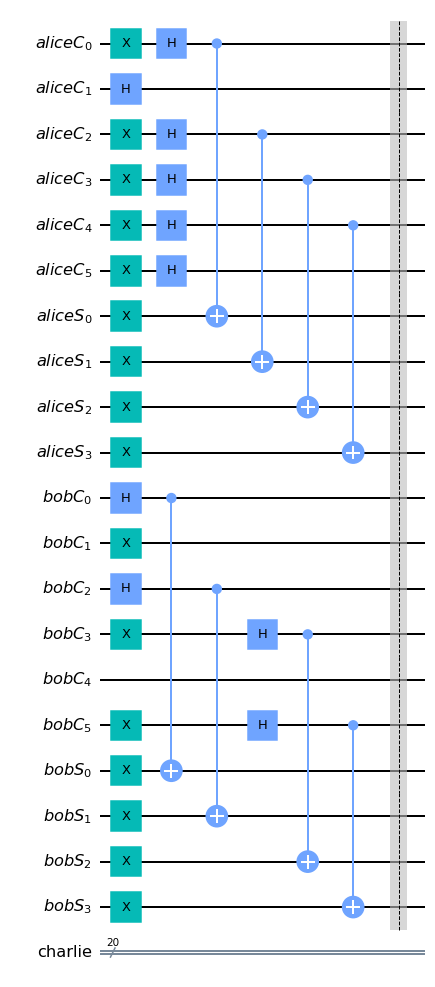

In [8]:
circuit = QuantumCircuit(Ca, Sa, Cb, Sb, Meas)

for i in range(num_epr):
    if a_epr_base[i] == 0:
        encode_psi_plus(circuit, Ca[Ca_epr[i]], Sa[i])
    elif a_epr_base[i] == 1:
        encode_psi_minus(circuit, Ca[Ca_epr[i]], Sa[i])
    if b_epr_base[i] == 0:
        encode_psi_plus(circuit, Cb[Cb_epr[i]], Sb[i])
    elif b_epr_base[i] == 1:
        encode_psi_minus(circuit, Cb[Cb_epr[i]], Sb[i])
        
for i in range(num_single):
    if a_single_qbit[i] == 1:
        circuit.x(Ca[Ca_single[i]])
    if a_single_base[i] == 1:
        circuit.h(Ca[Ca_single[i]])
    if b_single_qbit[i] == 1:
        circuit.x(Cb[Cb_single[i]])
    if b_single_base[i] == 1:
        circuit.h(Cb[Cb_single[i]])
        
circuit.barrier()
circuit.draw(output = 'mpl')

#### Step 3 : Bell State Measurement

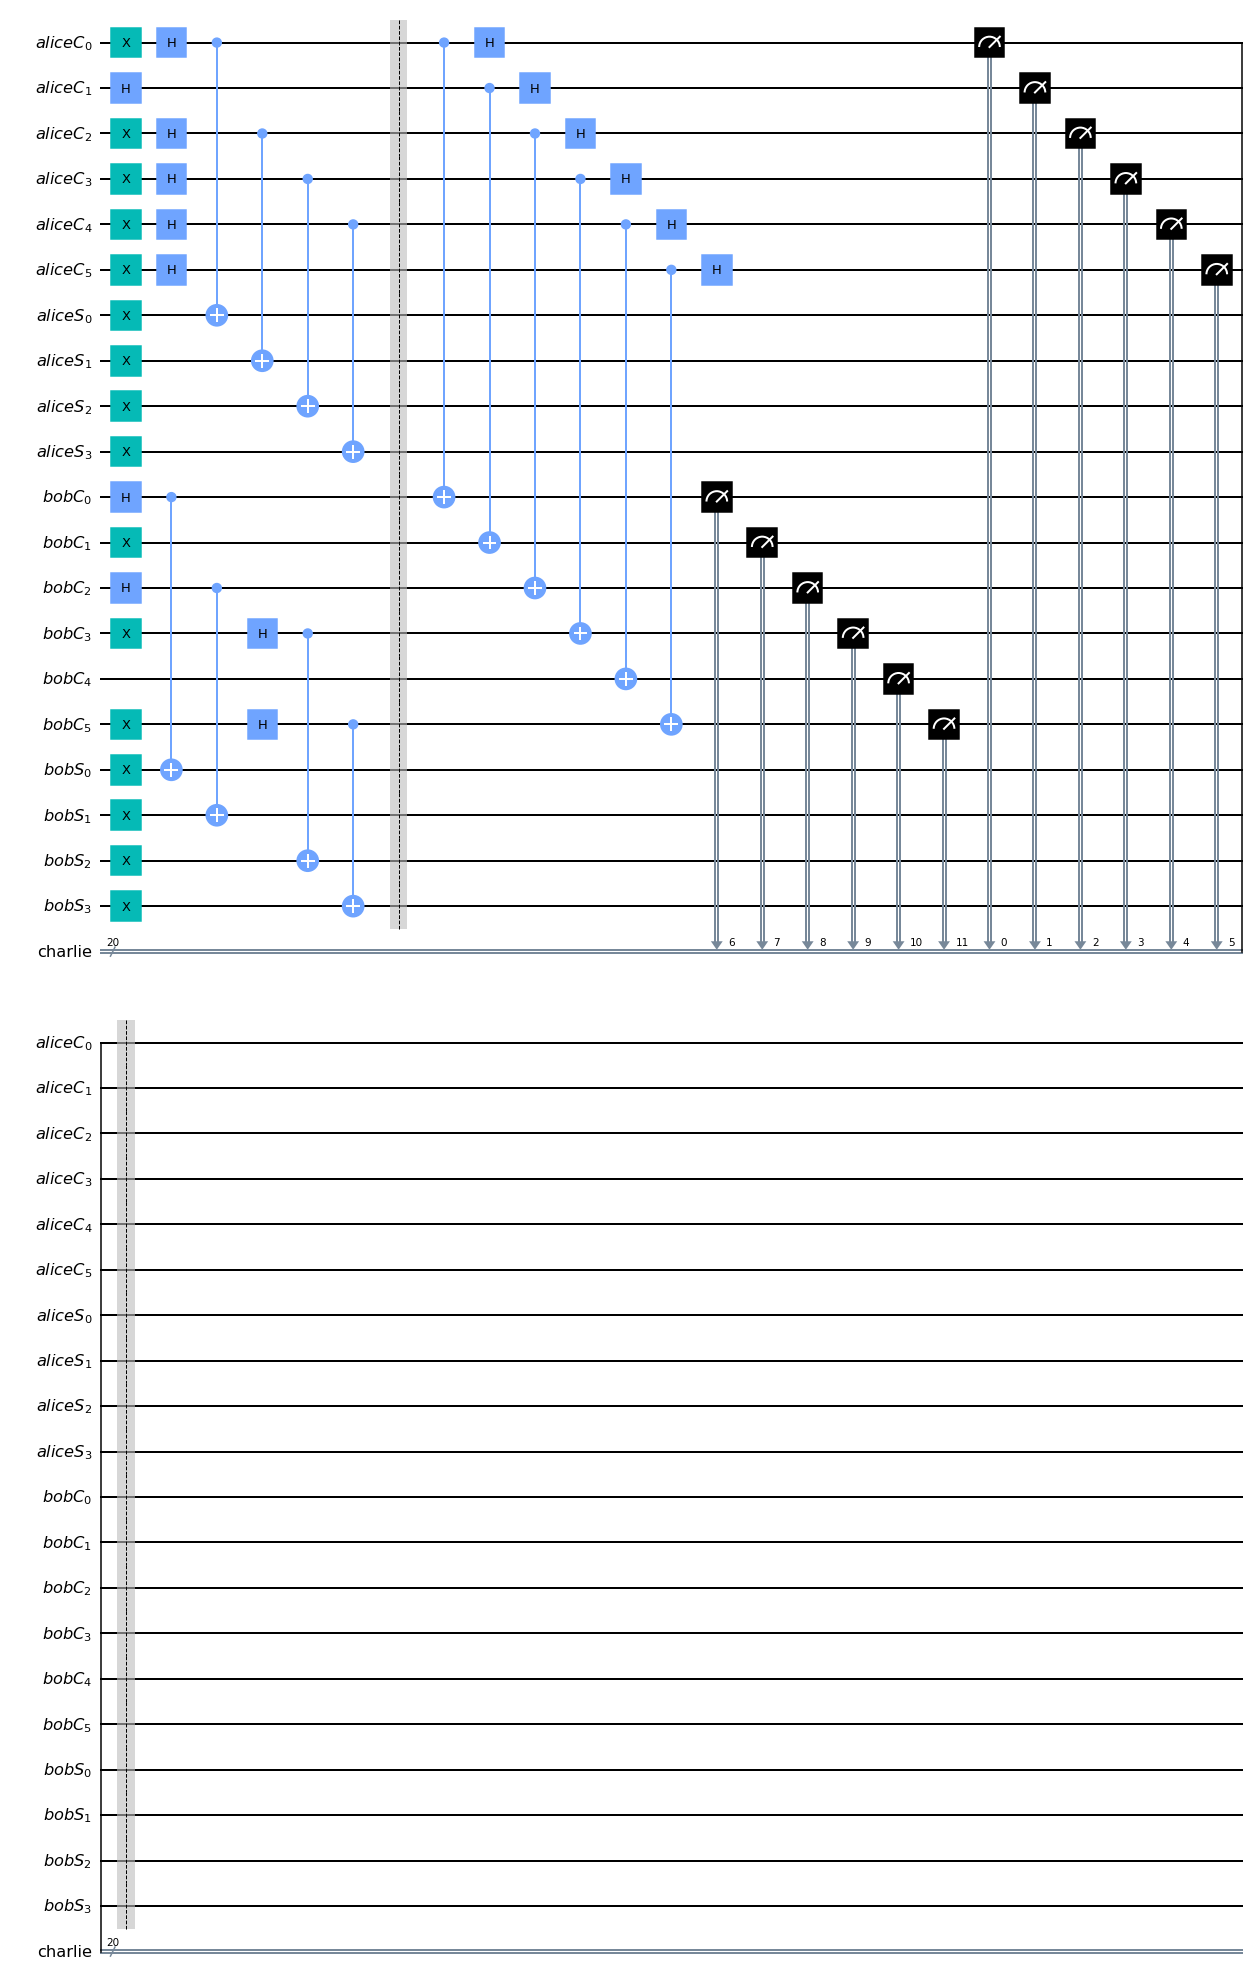

In [9]:
for i in range(num_epr + num_single):
    bell_meas(circuit, Ca[i], Cb[i])

circuit.measure(Ca, [i for i in range(6)])
circuit.measure(Cb, [i for i in range(6,12)])

circuit.barrier()
circuit.draw(output = 'mpl')

#### Step 4: Security Checking
<br>
Now as we have hardcoded the EPR bits we know from which to check the Security and which qubits are to be discarded 
<br>
This can be generalised in more qubit range but will get difficult to implement as number of discarding qubits and security qubits will change which will sometimes for our case may lead to 0 security bits.
<br>
1. Here 2nd bit of Ca and 2nd bit of Cb will be checked for security
<br>
2. 5th and 6th bit of Ca and Cb will be discarded as because of condition 
<br>
Here as we know security of a bit will not be checked if the bases of correspoding single bits are different 